# Weather Explorator Project

In this notebook, you will conduct an exploratory data analysis of weather data of Seoul. We would be going through the steps of setting up virtual environment, installing packages, loading data, generating plots, and creating an algorithm for prediction.

## Load Packages and Data

In this section, you will load useful packages and data.

In [1]:
# Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv('seoul_jan_feb_14.csv')
long_data = pd.read_csv('seoul_one_year.csv')

In [2]:
# show the data
data.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,seoul,2023-01-01,38.6,26.0,32.7,33.6,19.2,27.3,17.2,54.7,...,10.3,5,10,2023-01-01T07:46:52,2023-01-01T17:23:53,0.28,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47098099999,47112099999,4711909999..."
1,seoul,2023-01-02,30.7,19.0,24.3,24.6,12.1,17.9,5.4,44.4,...,10.9,5,10,2023-01-02T07:47:02,2023-01-02T17:24:41,0.31,Clear,Clear conditions throughout the day.,clear-day,"47111099999,47098099999,47112099999,4711909999..."
2,seoul,2023-01-03,32.1,15.8,23.3,26.7,10.2,19.2,5.9,48.6,...,10.9,5,10,2023-01-03T07:47:09,2023-01-03T17:25:30,0.35,Clear,Clear conditions throughout the day.,clear-day,"47111099999,47098099999,47112099999,4711909999..."
3,seoul,2023-01-04,37.5,21.5,28.8,33.1,15.6,25.4,12.1,50.0,...,10.3,5,10,2023-01-04T07:47:15,2023-01-04T17:26:20,0.38,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"47111099999,47098099999,47112099999,4711909999..."
4,seoul,2023-01-05,37.6,22.4,29.0,33.9,16.3,25.7,15.6,58.0,...,10.0,5,10,2023-01-05T07:47:18,2023-01-05T17:27:11,0.41,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47098099999,47112099999,4711909999..."


In [3]:
# show the data
long_data.head()

,latitude,longitude,elevation,utc_offset_seconds,timezone,timezone_abbreviation
0,37.6,127.0,37.0,0.0,GMT,GMT
1,time,temperature_2m (°C),NaN,NaN,NaN,NaN
2,2022-01-01T00:00,-7.1,NaN,NaN,NaN,NaN
3,2022-01-01T01:00,-5.0,NaN,NaN,NaN,NaN
4,2022-01-01T02:00,-2.8,NaN,NaN,NaN,NaN


In [4]:
# Preprocess the long term data
long_data_df = long_data.iloc[2:][["latitude", "longitude"]].rename(columns={"latitude": "time", "longitude": "temp"})
long_data_df.head()

,time,temp
2,2022-01-01T00:00,-7.1
3,2022-01-01T01:00,-5.0
4,2022-01-01T02:00,-2.8
5,2022-01-01T03:00,-1.1
6,2022-01-01T04:00,0.1


## Data Exploration

Feel free to do whatever you want with the data

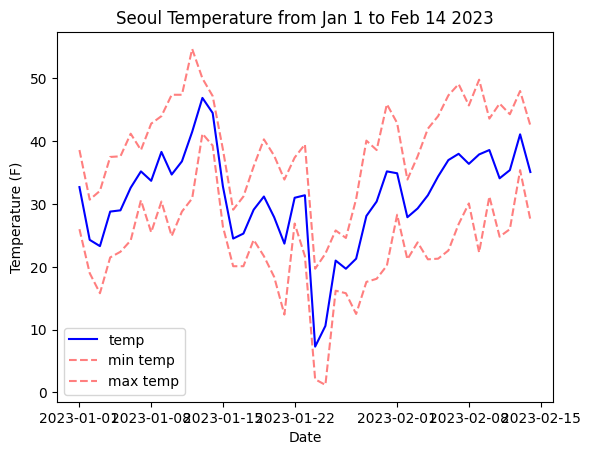

In [5]:
# Temperature Data
data["datetime"] = pd.to_datetime(data["datetime"])

plt.plot(data["datetime"], data["temp"], color = "blue", label = "temp")
plt.plot(data["datetime"], data["tempmin"], ls="--", color="red", alpha = 0.5, label = "min temp")
plt.plot(data["datetime"], data["tempmax"], ls="--", color = "red", alpha = 0.5, label = "max temp")
plt.xlabel("Date")
plt.ylabel("Temperature (F)")
plt.title("Seoul Temperature from Jan 1 to Feb 14 2023")
plt.legend()
plt.show()

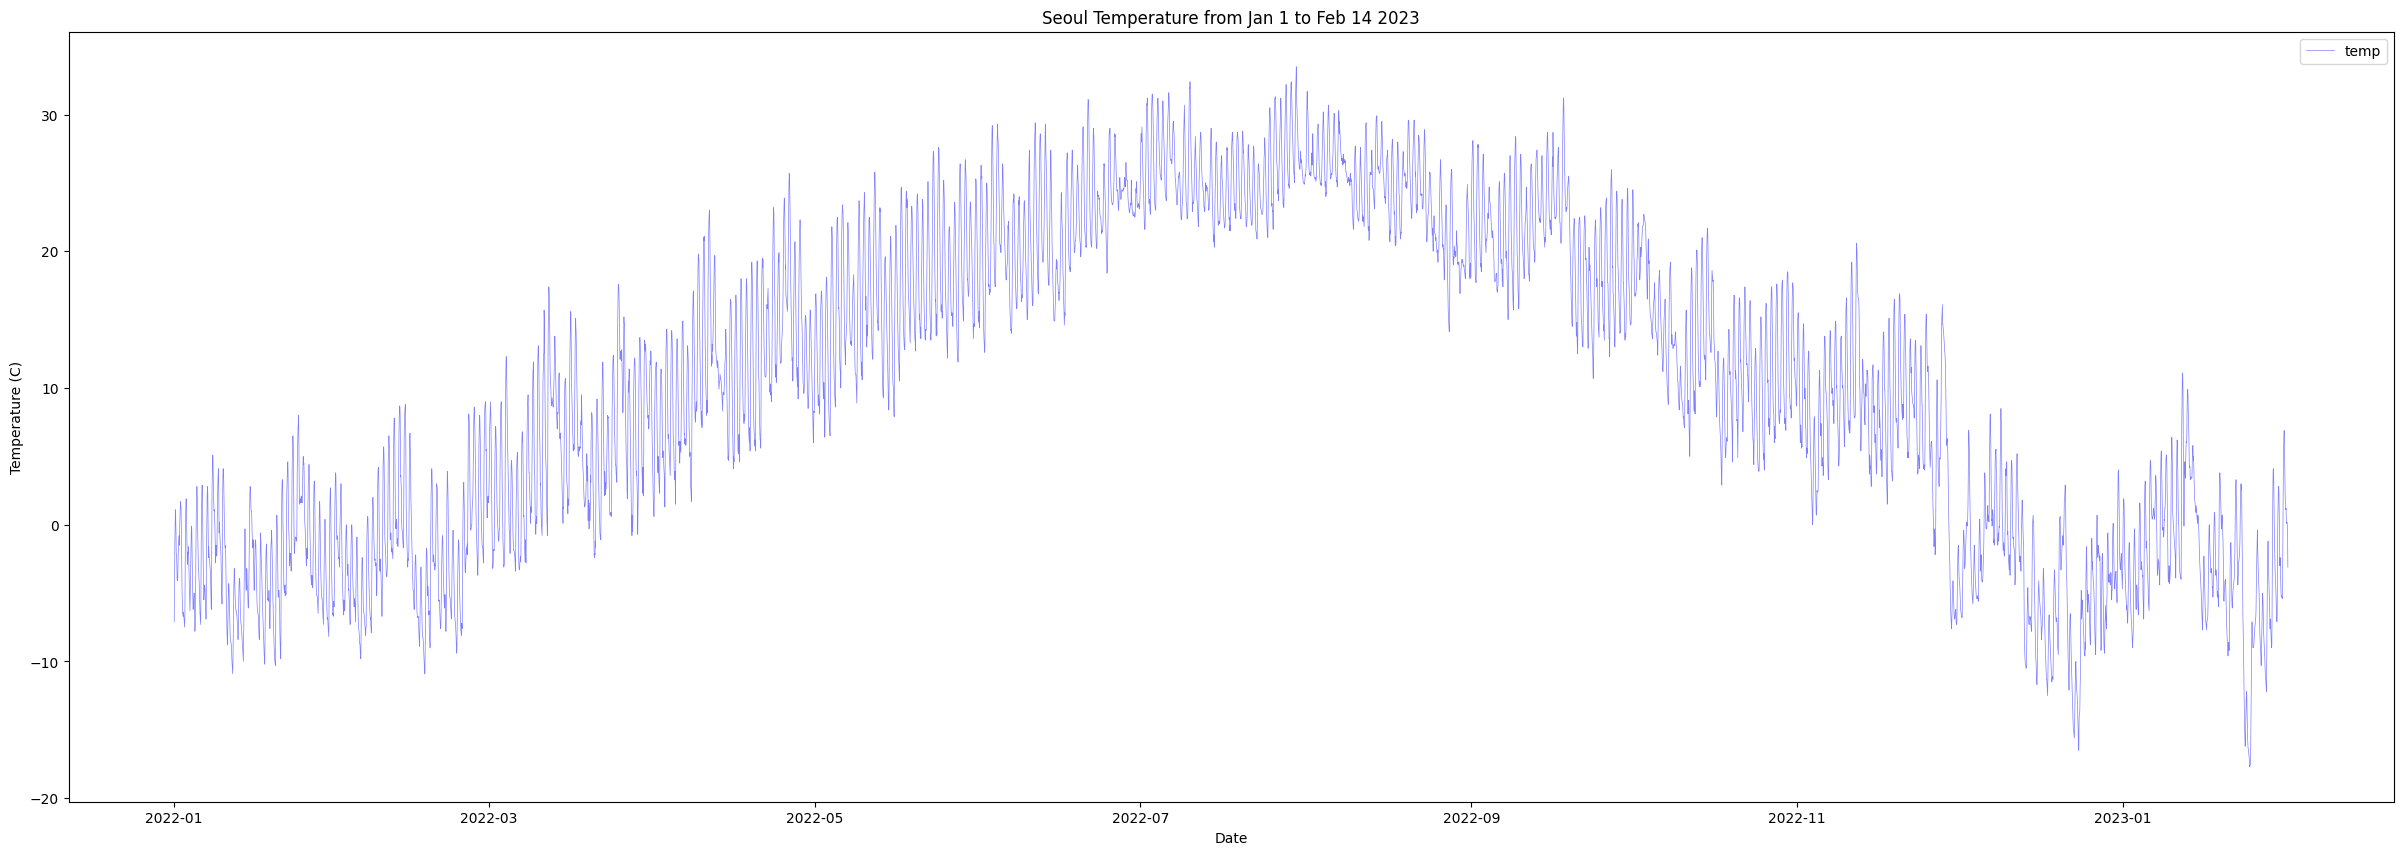

In [19]:
# Temperature Data

# Make sure the types are correct
long_data_df["time"] = pd.to_datetime(long_data_df["time"])
long_data_df["temp"] = long_data_df["temp"].apply(lambda x: float(x))

plt.figure(figsize=(30, 10))
plt.plot(long_data_df["time"], long_data_df["temp"], color = "blue", label = "temp", lw=0.5, alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.title("Seoul Temperature from Jan 1 to Feb 14 2023")
plt.legend()
plt.show()

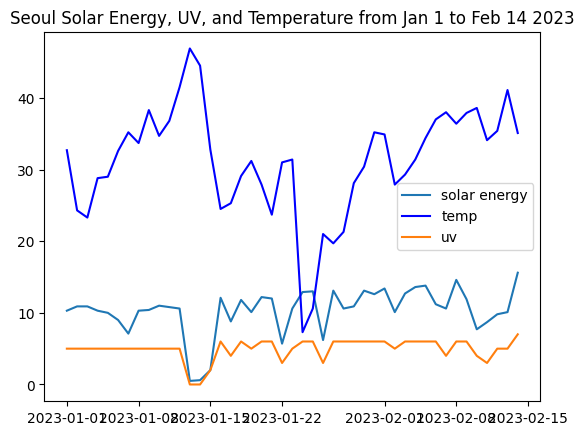

In [7]:
# Solar energy and UV index
plt.plot(data["datetime"], data["solarenergy"], label= "solar energy")
plt.plot(data["datetime"], data["temp"], color = "blue", label = "temp")
plt.plot(data["datetime"], data["uvindex"], label = "uv")
plt.title("Seoul Solar Energy, UV, and Temperature from Jan 1 to Feb 14 2023")
plt.legend()
plt.show()

## Data Prediction

In this section, we will use a simple time series model to predict future temperature change based on the previous temperatures.
Specifically, we will use one-year data to predict feb 1 - feb 14's temperature.

In [20]:
# Finding the correct parameters of ARIMA model to preidct the temperature
from pmdarima import auto_arima
stepwise_fit = auto_arima(long_data_df['temp'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17548.102, Time=5.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27159.489, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18828.912, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21442.796, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27157.491, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18625.275, Time=1.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=17547.330, Time=3.61 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18636.342, Time=0.76 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=18615.510, Time=0.62 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=17548.481, Time=6.44 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=18601.212, Time=0.70 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=17516.907, Time=6.13 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=17551.802, Time=7.05 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=17539.342, Time=7.65 sec
 ARIMA(2,1,3)(0,0,0

In [21]:
# Find the shape of the data
print(long_data_df.shape)
train=long_data_df.iloc[:-30]
test=long_data_df.iloc[-30:]
print(train.shape,test.shape)

(9504, 2)
(9474, 2) (30, 2)


In [22]:
# Using ARIMA model to predict the temperature
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['temp'],order=(2,1,4))
model=model.fit()
model.summary()

/Users/enjuichang/Desktop/visualization/python-course-code/weather_data_exploration/venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/enjuichang/Desktop/visualization/python-course-code/weather_data_exploration/venv/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   temp   No. Observations:                 9474
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -8324.036
Date:                Tue, 14 Feb 2023   AIC                          16662.072
Time:                        17:39:29   BIC                          16712.165
Sample:                             0   HQIC                         16679.074
                               - 9474                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9310      0.000   6353.374      0.000       1.930       1.932
ar.L2         -0.9991      0.000  -3352.128      0.000      -1.000      -0.999
ma.L1         -1.2762      0.007   -193.014      0.000      -1.289      -1.263
ma.L2         -0.0158      0.012     -1.305      0.192      -0.040       0.008
ma.L3          0.1791      0.016     11.443      0.000       0.148       0.210
ma.L4          0.2355      0.009     25.962      0.000       0.218       0.253
sigma2         0.3393      0.003    114.099      0.000       0.333       0.345
===================================================================================
Ljung-Box (L1) (Q):                   2.30   Jarque-Bera (JB):              9576.63
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

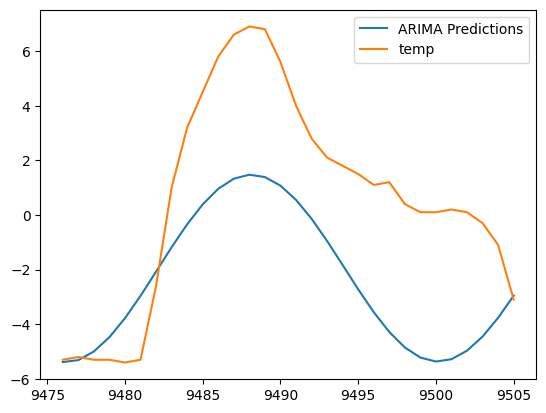

In [24]:
# Prediction
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['temp'].plot(legend=True)

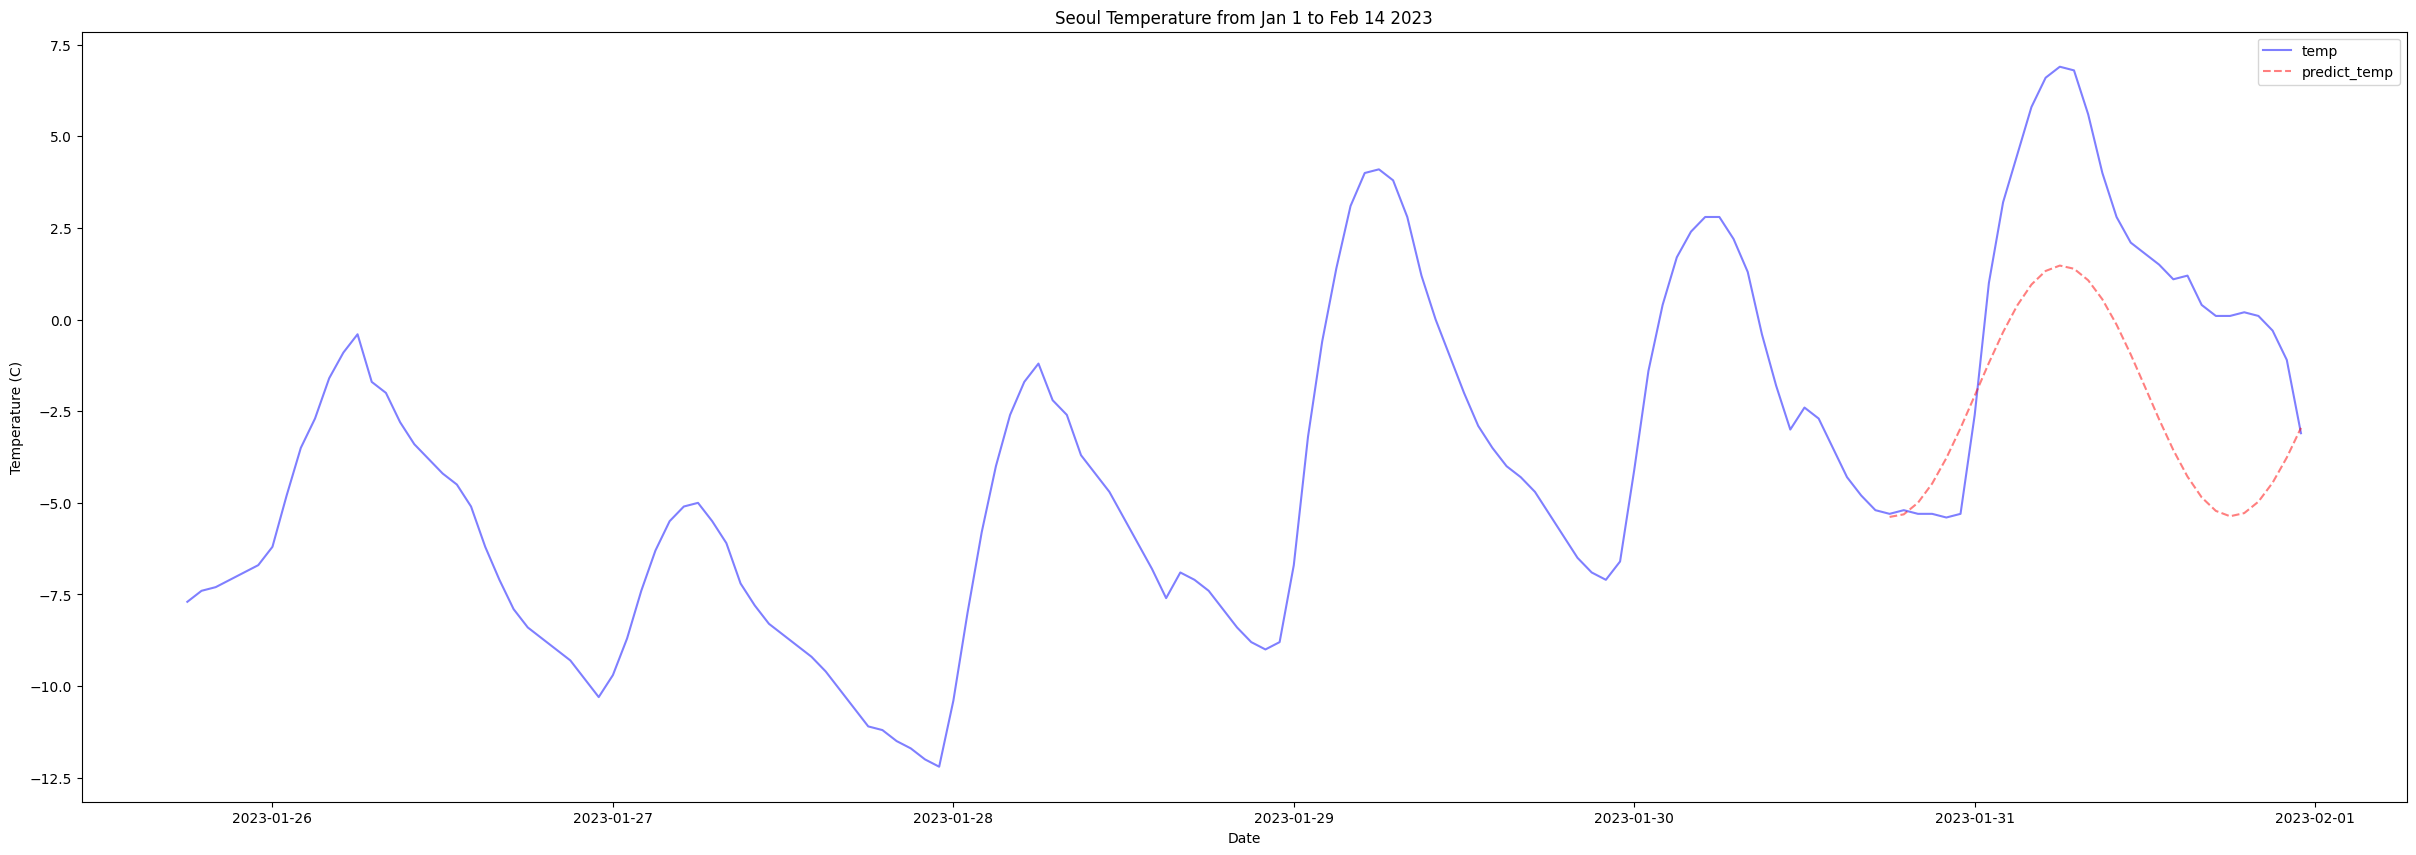

In [33]:
# Plotting them together
plt.figure(figsize=(30, 10))
plt.plot(long_data_df["time"].iloc[-150:], long_data_df["temp"].iloc[-150:], color = "blue", label = "temp", alpha=0.5)
plt.plot(long_data_df["time"].iloc[-30:], pred, color = "red", label = "predict_temp", ls="--", alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.title("Seoul Temperature from Jan 1 to Feb 14 2023")
plt.legend()
plt.show()

## Discussion

Any thing you realize from this process? Are there anything you want to share after working on a data science project?